In [288]:
# Importo el dataset con los goles y las librerias necesarias.

import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df_con_ccaa = pd.read_csv('data/messi_goles_con_caa.csv')
df_con_ccaa.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Comunidad
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho,Castilla La Mancha
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN,Atenas
2,10/11,UEFA Champions League,Group Stage,9/14/10,H,FC Barcelona,Panathinaikos Athens,5:01,CF,22,1:01,Left-footed shot,Xavi,Atenas
3,10/11,UEFA Champions League,Group Stage,9/14/10,H,FC Barcelona,Panathinaikos Athens,5:01,CF,45,3:01,Left-footed shot,Pedro,Atenas
4,10/11,UEFA Champions League,Group Stage,11/24/10,A,FC Barcelona,Panathinaikos Athens,0:03,CF,63,0:02,Left-footed shot,Adriano,Atenas


In [289]:
# Veo la sumatoria de goles agrupado por Comunidades Autonomas (o provincias/ciudades de equipos de otros países)

goles_por_comunidad = df_con_ccaa.groupby('Comunidad')['Opponent'].aggregate('count').sort_values(ascending=False)
goles_por_comunidad = pd.DataFrame(goles_por_comunidad)
goles_por_comunidad

,Opponent
Comunidad,
Madrid,108
Andalucía,102
C. Valenciana,81
País Vasco,80
Galicia,34
...,...
Castilla La Mancha,1
Budapest,1
Bremen,1


In [290]:
# Análisis de la primera hipótesis.

hipotesis_1 = """
    El desempeño goleador de Messi es más alto enfrentando a equipos de la Comunidad de Madrid que a cualquier otra Comunidad de España.
"""

In [291]:
# Messi le marcó mas goles a equipos de la Comunidad de Madrid que a cualquier otra Comunidad.

goles_por_comunidad['Opponent'] = goles_por_comunidad['Opponent'].astype(int)
goles_por_comunidad.sort_values('Opponent', ascending=False, inplace=True)
goles_por_comunidad[goles_por_comunidad['Opponent'] == goles_por_comunidad['Opponent'].max()]

,Opponent
Comunidad,
Madrid,108


In [292]:
# Pero falta ver el promedio de gol por partido

In [293]:
golespartidos = pd.read_csv('data/goles_mas_partidos.csv', encoding='latin-1', sep=";")
golespartidos.head()

,Equipos,Goles,Partidos
0,AC Milan,8 (8 CL),8 (8 CL)
1,Club Atletico de Ceuta,1 (1 CdR),1 (1 CdR)
2,AS Roma,2 (2 CL),4 (CL)
3,AC Ajaccio,1 (1 Liga),1 (1 Liga)
4,Ajax Amsterdam,6 (6 CL),3 (3 CL)


In [294]:
# Extraer solo goles y partidos y darle formato numero

lista = list(golespartidos['Goles'].values)
lista
lista_2 = []
for i in lista:
    lista_2.append(int(i[:2]))

print(lista_2)

lista_3 = list(golespartidos['Partidos'].values)
lista
lista_4 = []
for i in lista_3:
    lista_4.append(int(i[:2]))

print(lista_4)

[8, 1, 2, 1, 6, 1, 1, 3, 9, 29, 32, 1, 2, 7, 4, 1, 1, 25, 11, 2, 5, 1, 1, 13, 8, 3, 2, 2, 6, 1, 13, 20, 3, 7, 1, 2, 3, 1, 1, 2, 1, 21, 4, 15, 2, 3, 24, 2, 2, 3, 13, 7, 4, 3, 2, 1, 1, 6, 4, 4, 6, 25, 16, 2, 1, 12, 1, 18, 26, 26, 18, 8, 14, 3, 1, 20, 4, 1, 1, 2, 38, 3, 1, 4, 6, 1, 2, 1, 1, 13, 4, 31, 3, 3, 16, 1, 1]
[8, 1, 4, 1, 3, 2, 1, 2, 6, 41, 43, 1, 1, 3, 6, 1, 2, 22, 9, 2, 2, 1, 3, 18, 6, 10, 2, 2, 3, 1, 12, 17, 3, 5, 1, 2, 2, 1, 2, 2, 1, 27, 4, 15, 2, 9, 23, 3, 4, 2, 19, 8, 6, 3, 1, 4, 2, 8, 2, 4, 10, 35, 14, 1, 2, 13, 2, 11, 24, 47, 27, 12, 16, 5, 1, 11, 3, 2, 3, 1, 43, 5, 2, 2, 8, 4, 2, 2, 2, 12, 6, 36, 3, 2, 28, 2, 1]


In [295]:
# Goles y partidos limpios.

golespartidos['Goles'] = lista_2
golespartidos['Partidos'] = lista_4
golespartidos

,Equipos,Goles,Partidos
0,AC Milan,8,8
1,Club Atletico de Ceuta,1,1
2,AS Roma,2,4
3,AC Ajaccio,1,1
4,Ajax Amsterdam,6,3
...,...,...,...
92,VfB Stuttgart,3,3
93,FC Viktoria Plzen,3,2
94,Villarreal CF,16,28
95,SV Werder Bremen,1,2


In [296]:
# Goles por partido

golespartidos['Goles por partido'] = golespartidos['Goles'] / golespartidos['Partidos']
golespartidos.sort_values('Goles por partido', ascending=False)

,Equipos,Goles,Partidos,Goles por partido
20,CD Tenerife,5,2,2.500000
13,Bayer 04 Leverkusen,7,3,2.333333
12,BATE Borisov,2,1,2.000000
63,RB Leipzig,2,1,2.000000
4,Ajax Amsterdam,6,3,2.000000
...,...,...,...,...
22,Cadiz CF,1,3,0.333333
45,Juventus FC,3,9,0.333333
25,Chelsea FC,3,10,0.300000
85,Sporting CP,1,4,0.250000


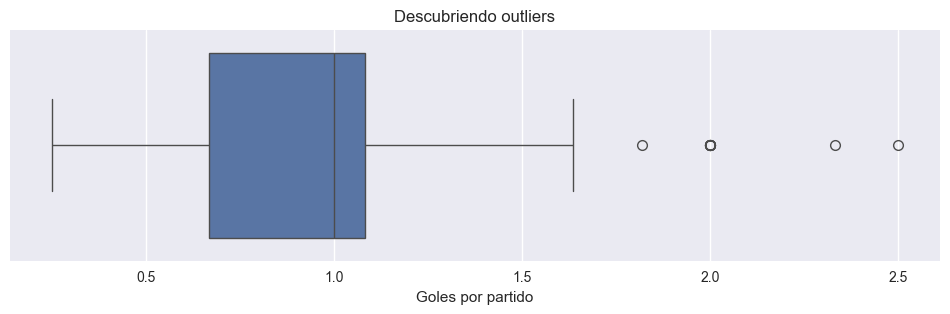

In [297]:
# Hay varios equipos donde el promedio de gol se diferencia mucho del resto

fig = plt.figure(figsize=(12,3))
sns.boxplot(x=golespartidos["Goles por partido"])
plt.title('Descubriendo outliers');

In [298]:
fig.savefig('graficos/outliers_promedio_gol.png')

Text(0.5, 1.0, 'Distribución del promedio de gol')

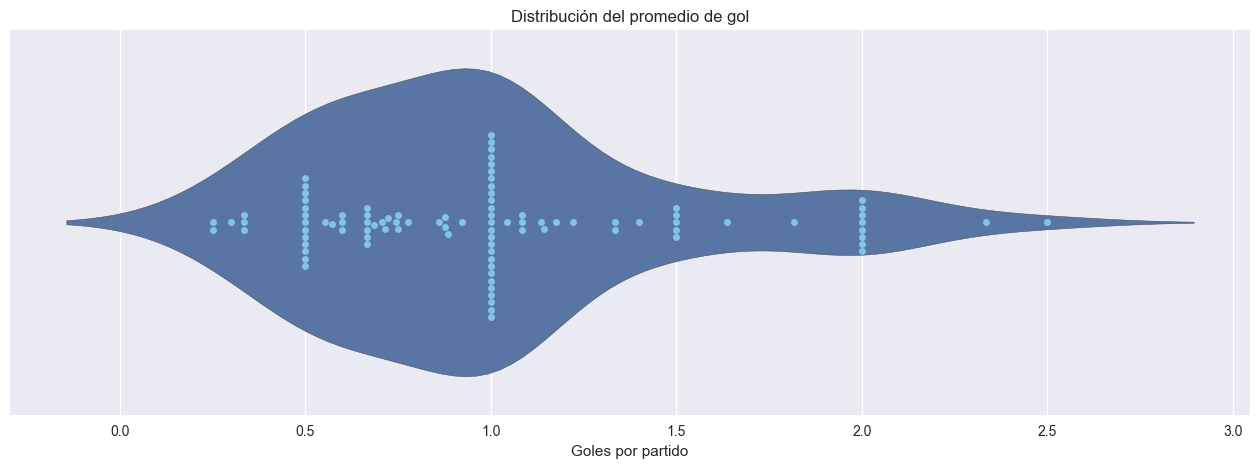

In [299]:
fig = plt.figure(figsize=(16,5))
sns.violinplot(x=golespartidos["Goles por partido"], inner=None)
sns.swarmplot(data=golespartidos, x='Goles por partido', color='skyblue', alpha=0.9)
plt.title("Distribución del promedio de gol")

In [300]:
fig.savefig('graficos/outliers_promedio_gol_violin.png')

In [301]:
# Hay muchos equipos contra los que te tiene un promedio de gol muy alto, pero pocos partidos.
# Para el análisis de Comunidades se tendrán en cuenta vs las que haya disputado al menos 10 partidos.

golespartidos.sort_values('Goles por partido', ascending=False).head(15)

,Equipos,Goles,Partidos,Goles por partido
20,CD Tenerife,5,2,2.500000
13,Bayer 04 Leverkusen,7,3,2.333333
12,BATE Borisov,2,1,2.000000
63,RB Leipzig,2,1,2.000000
4,Ajax Amsterdam,6,3,2.000000
28,CÃ³rdoba CF,6,3,2.000000
58,PSV Eindhoven,4,2,2.000000
54,Gimnastic de Tarragona,2,1,2.000000
83,Spartak Moscow,4,2,2.000000
79,Santos FC,2,1,2.000000


In [302]:
# Dataset creado manualmente para agregar las Comunidades a las que pertenece cada equipo.

ccaa = pd.read_csv('data/comunidades_limpio.csv', sep=",")
ccaa.head()

,Opponent,Comunidad
0,Albacete Balompie,Castilla La Mancha
1,Panathinaikos Athens,Atenas
2,Racing Santander,Cantabria
3,Athletic Bilbao,País Vasco
4,Deportivo Alaves,País Vasco


In [303]:
# Merge del dataset de goles con el de Comunidades.

golespartidos_conccaa = pd.merge(golespartidos, ccaa, how='inner', left_on='Equipos', right_on='Opponent')
golespartidos_conccaa

,Equipos,Goles,Partidos,Goles por partido,Opponent,Comunidad
0,AC Milan,8,8,1.000000,AC Milan,Milan
1,Club Atletico de Ceuta,1,1,1.000000,Club Atletico de Ceuta,Ceuta
2,AS Roma,2,4,0.500000,AS Roma,Roma
3,AC Ajaccio,1,1,1.000000,AC Ajaccio,Ajaccio
4,Ajax Amsterdam,6,3,2.000000,Ajax Amsterdam,Amnsterdam
...,...,...,...,...,...,...
91,VfB Stuttgart,3,3,1.000000,VfB Stuttgart,Stuttgart
92,FC Viktoria Plzen,3,2,1.500000,FC Viktoria Plzen,Pilsen
93,Villarreal CF,16,28,0.571429,Villarreal CF,C. Valenciana
94,SV Werder Bremen,1,2,0.500000,SV Werder Bremen,Bremen


In [304]:
# Partidos vs equipos de cada Comunidad

golespartidos_conccaa.groupby('Comunidad')['Partidos'].aggregate(sum).sort_values(ascending=False).head(15)

C:\Users\matia\AppData\Local\Temp\ipykernel_47524\1162024830.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  golespartidos_conccaa.groupby('Comunidad')['Partidos'].aggregate(sum).sort_values(ascending=False).head(15)


Comunidad
Madrid             137
Andalucía          112
C. Valenciana       95
País Vasco          91
Cataluña            40
Galicia             35
Navarrra            22
Aragón              19
Londres             18
Castilla y León     15
Manchester          14
Islas Baleares      14
Cantabria           13
París               10
Turin                9
Name: Partidos, dtype: int64

In [305]:
# Mejor promedio vs comunidades o provincias de otros paises en donde al menos haya jugado 10 partidos.

mas_10_partidos = golespartidos_conccaa[golespartidos_conccaa['Comunidad'].isin(golespartidos_conccaa.groupby('Comunidad')['Partidos'].aggregate(sum).sort_values(ascending=False).head(14).index)]
mas_10_partidos.head()

C:\Users\matia\AppData\Local\Temp\ipykernel_47524\3349464316.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  mas_10_partidos = golespartidos_conccaa[golespartidos_conccaa['Comunidad'].isin(golespartidos_conccaa.groupby('Comunidad')['Partidos'].aggregate(sum).sort_values(ascending=False).head(14).index)]


,Equipos,Goles,Partidos,Goles por partido,Opponent,Comunidad
8,Arsenal FC,9,6,1.500000,Arsenal FC,Londres
9,Athletic Bilbao,29,41,0.707317,Athletic Bilbao,País Vasco
10,Atletico de Madrid,32,43,0.744186,Atletico de Madrid,Madrid
15,Benidorm CD,1,1,1.000000,Benidorm CD,C. Valenciana
17,CA Osasuna,25,22,1.136364,CA Osasuna,Navarrra


In [306]:
# Calculo del promedio por Comunidad

mas_10_partidos.groupby('Comunidad')['Goles por partido'].mean().sort_values(ascending=False)

Comunidad
Cataluña           1.238095
Islas Baleares     1.142857
Navarrra           1.136364
Aragón             1.104167
País Vasco         1.068875
Madrid             0.986748
C. Valenciana      0.979336
Galicia            0.949346
Andalucía          0.940657
Londres            0.933333
Cantabria          0.923077
Castilla y León    0.888889
Manchester         0.770833
París              0.600000
Name: Goles por partido, dtype: float64

In [307]:
# La hipotesis inicial es que el mejor rendimiento es vs. equipos de la Comunidad de Madrid, los resultados muestran que es la 6ta Comunidad en cuanto a rendimiento.

mas_10_partidos.groupby('Comunidad')['Goles por partido'].mean().sort_values(ascending=False).head(10)

Comunidad
Cataluña          1.238095
Islas Baleares    1.142857
Navarrra          1.136364
Aragón            1.104167
País Vasco        1.068875
Madrid            0.986748
C. Valenciana     0.979336
Galicia           0.949346
Andalucía         0.940657
Londres           0.933333
Name: Goles por partido, dtype: float64

In [308]:
# Rendimiento en clásicos (vs Real Madrid y vs Espanyol)

derby = df_con_ccaa[(df_con_ccaa['Opponent'] == 'RCD Espanyol Barcelona') | (df_con_ccaa['Opponent'] == 'Real Madrid')]
derby.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Comunidad
193,06/07,LaLiga,26,03/10/07,H,FC Barcelona,Real Madrid,3:03,RW,11,1:01,Left-footed shot,Samuel Etoo,Madrid
194,06/07,LaLiga,26,03/10/07,H,FC Barcelona,Real Madrid,3:03,RW,28,2:02,Left-footed shot,NaN,Madrid
195,06/07,LaLiga,26,03/10/07,H,FC Barcelona,Real Madrid,3:03,RW,90+1,3:03,Left-footed shot,Ronaldinho Gaacho,Madrid
196,08/09,LaLiga,15,12/13/08,H,FC Barcelona,Real Madrid,2:00,RW,89,2:00,Counter attack goal,Thierry Henry,Madrid
197,08/09,LaLiga,34,05-02/09,A,FC Barcelona,Real Madrid,2:06,CF,35,1:03,Left-footed shot,Xavi,Madrid


In [309]:
mas_10_partidos[mas_10_partidos['Equipos'].isin(derby['Opponent'].values)]

,Equipos,Goles,Partidos,Goles por partido,Opponent,Comunidad
60,RCD Espanyol Barcelona,25,35,0.714286,RCD Espanyol Barcelona,Cataluña
68,Real Madrid,26,47,0.553191,Real Madrid,Madrid


In [310]:
# Promedio de gol en clásicos

mas_10_partidos[mas_10_partidos['Equipos'].isin(derby['Opponent'].values)]['Goles por partido'].mean()

0.6337386018237082

In [311]:
# Promedio general

(golespartidos_conccaa['Goles'].sum()) / (golespartidos_conccaa['Partidos'].sum())

0.8709273182957393

In [312]:
'''
El rendimiento de goles en los derby baja considerablemente con respecto al promedio general
'''

'\nEl rendimiento de goles en los derby baja considerablemente con respecto al promedio general\n'

In [313]:
'''
Gráficos
'''

'\nGráficos\n'

C:\Users\matia\AppData\Local\Temp\ipykernel_47524\2485548401.py:5: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df=a.groupby('Comunidad')['Partidos'].aggregate(sum).sort_values(ascending=False)
C:\Users\matia\AppData\Local\Temp\ipykernel_47524\2485548401.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Comunidad", y="Partidos", data=df, palette="Set3", estimator="sum", errorbar=None)


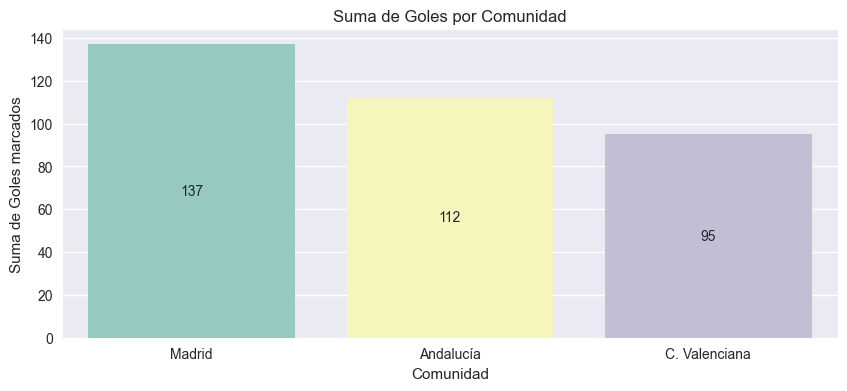

In [314]:
# Gráfico de Comunidades con más goles recibidos

plt.style.use('seaborn-v0_8')
a = golespartidos_conccaa[(golespartidos_conccaa['Comunidad']=='Madrid') | (golespartidos_conccaa['Comunidad']=='Andalucía') | (golespartidos_conccaa['Comunidad']=='C. Valenciana')]
df=a.groupby('Comunidad')['Partidos'].aggregate(sum).sort_values(ascending=False)
df = pd.DataFrame(df)
fig = plt.figure(figsize=(10, 4))
ax = sns.barplot(x="Comunidad", y="Partidos", data=df, palette="Set3", estimator="sum", errorbar=None)
plt.title("Suma de Goles por Comunidad")
plt.xlabel("Comunidad")
plt.ylabel("Suma de Goles marcados")
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=10);

In [315]:
# import os
# os.getcwd()
fig.savefig('graficos/partidosporcomunidad.png')

C:\Users\matia\AppData\Local\Temp\ipykernel_47524\1007116382.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Comunidad", y="Goles por partido", data=df, palette="Set3", estimator="sum", errorbar=None)


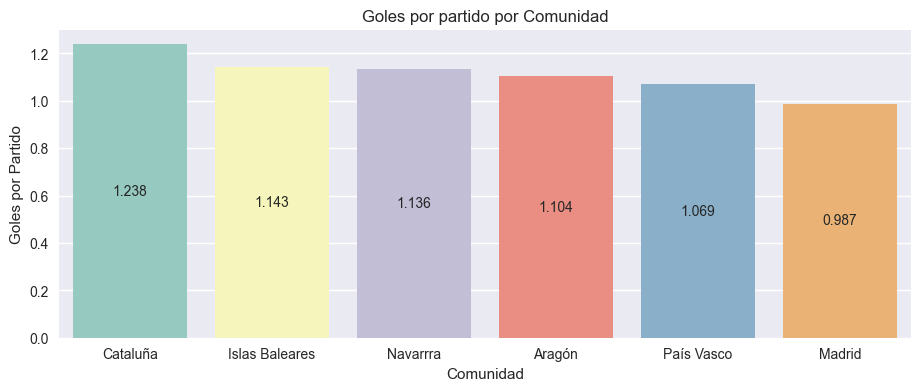

In [316]:
# Gráfico de Comunidades con mejor promedio de gol

df = mas_10_partidos.groupby('Comunidad')['Goles por partido'].aggregate('mean').round(3).sort_values(ascending=False).head(6)
df = pd.DataFrame(df)
fig = plt.figure(figsize=(11, 4))
ax = sns.barplot(x="Comunidad", y="Goles por partido", data=df, palette="Set3", estimator="sum", errorbar=None)
plt.title("Goles por partido por Comunidad")
plt.xlabel("Comunidad")
plt.ylabel("Goles por Partido")
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=10);

In [317]:
fig.savefig('graficos/golesporpartidoporcomunidad.png')

C:\Users\matia\AppData\Local\Temp\ipykernel_47524\191173725.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=["General", "Clásicos"], y=[promedio_general,promedio_derby], palette="Set3", estimator="sum", errorbar=None)


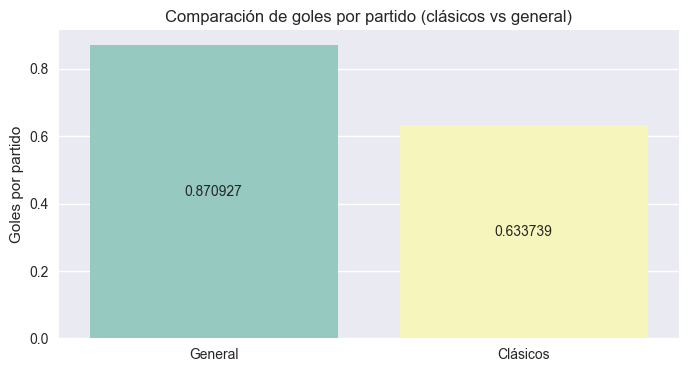

In [318]:
# Gráfico de diferencia entre promedio general y promedio en clásicos.

promedio_derby = mas_10_partidos[mas_10_partidos['Equipos'].isin(derby['Opponent'].values)]['Goles por partido'].mean()
promedio_general = (golespartidos_conccaa['Goles'].sum()) / (golespartidos_conccaa['Partidos'].sum())

fig = plt.figure(figsize=(8, 4))
ax = sns.barplot(x=["General", "Clásicos"], y=[promedio_general,promedio_derby], palette="Set3", estimator="sum", errorbar=None)
plt.title("Comparación de goles por partido (clásicos vs general)")
plt.ylabel("Goles por partido")
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=10);

In [319]:
fig.savefig('graficos/comparación_clasicos_vs_general.png')

In [320]:
'''
Análisis de la estatura de Messi en comparación con los demas goleadores del top 50
Algunos datos de estaturas no los pude obtener por lo no serán tenidos en cuenta esos futbolistas
'''

'\nAnálisis de la estatura de Messi en comparación con los demas goleadores del top 50\nAlgunos datos de estaturas no los pude obtener por lo no serán tenidos en cuenta esos futbolistas\n'

In [321]:
#Cargo el dataset de goleadores y veo que no queden datos nulos

goleadores = pd.read_csv('data/goleadores.csv')
goleadores = goleadores.dropna()
goleadores.isnull().values.any()

False

In [322]:
# Paso la altura a tipo float

goleadores['Altura'] = goleadores['Altura'].str.replace(',', '.').astype(float)
goleadores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Jugador   45 non-null     object 
 1   Goles     45 non-null     int64  
 2   Partidos  45 non-null     int64  
 3   Promedio  45 non-null     float64
 4   Altura    45 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [323]:
# Hay un dato mal escrito.

goleadores.sort_values('Altura', ascending=False).head()

,Jugador,Goles,Partidos,Promedio,Altura
28,Imre Schlosser,475,388,1.22,178.00
11,Zlatan Ibrahimović,573,986,0.58,1.95
41,Sebastián Abreu,435,852,0.51,1.93
37,Aleksandar Đurić,443,733,0.60,1.92
0,Cristiano Ronaldo,859,1187,0.72,1.87


In [324]:
goleadores.at[28, 'Altura'] = 1.78

In [325]:
df = goleadores.sort_values('Altura', ascending=True).head(6)
df

,Jugador,Goles,Partidos,Promedio,Altura
4,Romário,753,963,0.78,1.67
16,Jimmy McGrory,528,522,1.01,1.68
1,Lionel Messi,819,1042,0.79,1.70
15,Uwe Seeler,535,653,0.82,1.70
21,Ferenc Bene,508,493,1.03,1.71
49,József Takacs,418,388,1.08,1.72


In [326]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


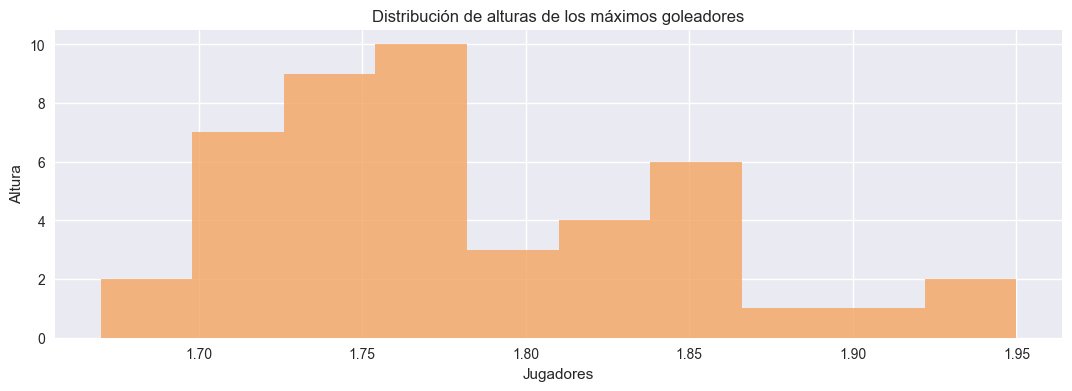

In [327]:
# Gráfico de distribución de alturas.

plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(13, 4))
ax = plt.hist(goleadores['Altura'], bins=10, color='sandybrown', alpha=0.8)
plt.title("Distribución de alturas de los máximos goleadores")
plt.xlabel("Jugadores")
plt.ylabel("Altura");


In [328]:
fig.savefig('graficos/distribucion_alturas.png')

In [329]:
goleadores_mas_bajos = (goleadores.sort_values(by="Altura", ascending=True)).iloc[0:9, :]
goleadores_mas_bajos = goleadores_mas_bajos.sort_values(by="Altura", ascending=False)
goleadores_mas_bajos

,Jugador,Goles,Partidos,Promedio,Altura
49,József Takacs,418,388,1.08,1.72
5,Ferenc Puskás,741,746,0.99,1.72
30,Jimmy Greaves,466,661,0.70,1.72
19,Zico,523,773,0.68,1.72
21,Ferenc Bene,508,493,1.03,1.71
1,Lionel Messi,819,1042,0.79,1.70
15,Uwe Seeler,535,653,0.82,1.70
16,Jimmy McGrory,528,522,1.01,1.68
4,Romário,753,963,0.78,1.67


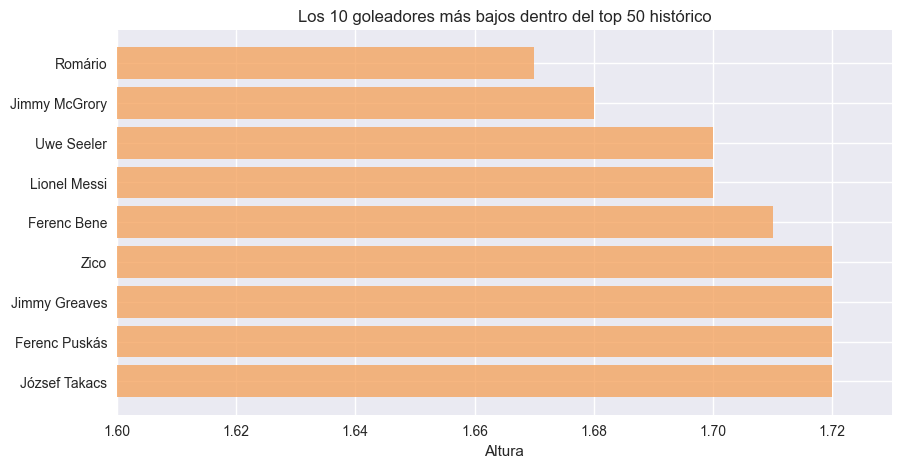

In [330]:
# Comparativa alturas

# goleadores_mas_bajos = (goleadores.sort_values(by="Altura", ascending=True)).iloc[0:9, :]
fig = plt.figure(figsize=(10, 5))
ax = plt.barh(goleadores_mas_bajos["Jugador"], goleadores_mas_bajos["Altura"], color='sandybrown', alpha=0.8)
plt.title("Los 10 goleadores más bajos dentro del top 50 histórico")
plt.xlabel("Altura")
plt.xlim(1.6, 1.73);

In [331]:
fig.savefig('graficos/los10masbajos.png')

In [332]:
'''
No solo Messi no es el jugador más bajo (si bien esta entre los 3 más bajos) sino que la mayoria de los goleadores
del top 50 tienen o tuvieron estaturas de entre 1.67 m y 1.72 m
'''

'\nNo solo Messi no es el jugador más bajo (si bien esta entre los 3 más bajos) sino que la mayoria de los goleadores\ndel top 50 tienen o tuvieron estaturas de entre 1.67 m y 1.72 m\n'